#### Load dataset

In [15]:
import pandas as pd
import re

df = pd.read_csv("C:\\Users\\dolap\\OneDrive\\Documents\\DOLAPO\\data-analysis\\literature_syn_analysis\\fully_screened.csv")


#### Clean and summarise imaging methods

In [16]:
def clean_text(text):
    if pd.isna(text):
        return ""
    text = text.lower().strip()
    text = re.sub(r'[^a-z0-9, ]+', '', text)  # keep alphanumeric + comma
    text = re.sub(r'\s+', ' ', text)          # normalize spaces
    return text
df["Imaging Method Clean"] = df["Imaging Method"].apply(clean_text)
df["Indicator Clean"] = df["Biodiversity Indicators Type"].apply(clean_text)


In [17]:
method_map = {
    "photoquadrat": "photoquadrats",
    "photo quadrat": "photoquadrats",
    "phototransect": "photoquadrats",
    "tow videos": "towed videos",
    "underwater vidoes": "underwater videos",
    "bruvs": "bruv",
    "baited remote underwater video": "bruv",
    "satellite image": "satellite imagery",
    "satellite imageryremote sensing": "satellite imagery",
    "satellite imageryremote sensing": "satellite imagery",
    "remote sensing": "satellite imagery",
    "sfm": "structure-from-motion",
    "structure from motion": "structure-from-motion",
}


In [18]:
indicator_map = {
    "species richness": "richness",
    "species diversity": "diversity",
    "species composition": "composition",
    "species distribution": "distribution",
    "spatial distribution": "distribution",
    "species abundance": "abundance",
    "relative abundance": "abundance",
    "abundance": "abundance",
    "species coverage": "cover",
    "habitat mapping": "habitat mapping",
    "structural complexity": "complexity",
    "habitat structure": "complexity",
}


In [19]:
def replace_synonyms(item_list, mapping):
    cleaned = []
    for item in item_list:
        if item in mapping:
            cleaned.append(mapping[item])
        else:
            cleaned.append(item)
    return cleaned


#### summary of the biodiversity indicator types

In [20]:
df["Method List"] = df["Imaging Method Clean"].apply(
    lambda x: [i.strip() for i in x.split(",") if i.strip()]
)

df["Indicator List Raw"] = df["Indicator Clean"].apply(
    lambda x: [i.strip() for i in x.split(",") if i.strip()]
)


In [21]:
df["Method List"] = df["Method List"].apply(lambda x: replace_synonyms(x, method_map))
df["Indicator List"] = df["Indicator List Raw"].apply(lambda x: replace_synonyms(x, indicator_map))


In [22]:
methods_exploded = df.explode("Method List")
indicators_exploded = df.explode("Indicator List")

method_counts_clean = methods_exploded["Method List"].value_counts()
indicator_counts_clean = indicators_exploded["Indicator List"].value_counts()

method_counts_clean.head(20), indicator_counts_clean.head(20)


(Method List
 satellite imagery        62
 bruv                     36
 rov                      32
 dov                      24
 photoquadrats            22
 auv                      18
 uav                      16
 structure-from-motion    12
 still images              7
 usv                       3
 aerial photographs        3
 uvc                       2
 uas                       2
 satellite images          2
 aerial photograph         2
 towed camera              2
 aerial photography        2
 remote video              1
 auvs                      1
 camera trap               1
 Name: count, dtype: int64,
 Indicator List
 distribution               30
 richness                   21
 complexity                 19
 abundance                  19
 habitat mapping            12
 composition                 8
 cover                       6
 diversity                   5
 biomass                     5
 habitat classification      4
 assemblages                 4
 aereal extent        

In [23]:
methods_exploded = df.explode("Method List")
indicators_exploded = df.explode("Indicator List")

method_counts_clean = methods_exploded["Method List"].value_counts()
indicator_counts_clean = indicators_exploded["Indicator List"].value_counts()

method_counts_clean.head(20), indicator_counts_clean.head(20)


(Method List
 satellite imagery        62
 bruv                     36
 rov                      32
 dov                      24
 photoquadrats            22
 auv                      18
 uav                      16
 structure-from-motion    12
 still images              7
 usv                       3
 aerial photographs        3
 uvc                       2
 uas                       2
 satellite images          2
 aerial photograph         2
 towed camera              2
 aerial photography        2
 remote video              1
 auvs                      1
 camera trap               1
 Name: count, dtype: int64,
 Indicator List
 distribution               30
 richness                   21
 complexity                 19
 abundance                  19
 habitat mapping            12
 composition                 8
 cover                       6
 diversity                   5
 biomass                     5
 habitat classification      4
 assemblages                 4
 aereal extent        

#### Publication per year

In [4]:
year_counts = df["year"].value_counts().sort_index()
print(year_counts)


year
1990     1
1997     1
2002     2
2003     2
2005     1
2006     1
2007     1
2008     8
2010     7
2011     1
2012     9
2013     5
2014     8
2015     3
2016     9
2017     5
2018    11
2019    20
2020    15
2021    23
2022    20
2023    10
2024    16
2025    38
2026     1
Name: count, dtype: int64


In [5]:
# remove records with year 2026 and update related summary
df = df[df["year"] != 2026].reset_index(drop=True)

year_counts = df["year"].value_counts().sort_index()
print("New shape:", df.shape)
print(year_counts)

New shape: (217, 6)
year
1990     1
1997     1
2002     2
2003     2
2005     1
2006     1
2007     1
2008     8
2010     7
2011     1
2012     9
2013     5
2014     8
2015     3
2016     9
2017     5
2018    11
2019    20
2020    15
2021    23
2022    20
2023    10
2024    16
2025    38
Name: count, dtype: int64


##### Crosstab: top methods × top indicators

In [6]:
top_methods = method_counts.head(5).index.tolist()
top_inds = indicator_counts.head(8).index.tolist()

df_long = df.copy()
df_long["Imaging Method List"] = df_long["Imaging Method"].apply(split_clean_methods)
df_long["Indicator List"] = df_long["Biodiversity Indicators Type"].apply(split_clean_inds)

rows = []
for _, row in df_long.iterrows():
    for m in row["Imaging Method List"]:
        for ind in row["Indicator List"]:
            rows.append((m, ind))

mi_df = pd.DataFrame(rows, columns=["Method", "Indicator"])

mi_df_top = mi_df[mi_df["Method"].isin(top_methods) & mi_df["Indicator"].isin(top_inds)]
crosstab_top = pd.crosstab(mi_df_top["Method"], mi_df_top["Indicator"])

print(crosstab_top)


Indicator          Species richness  habitat mapping  habitat structure  \
Method                                                                    
AUV                               0                5                  2   
BRUV                              3                0                  0   
DOV                               2                0                  1   
ROV                               1                2                  2   
satellite imagery                 1                2                  2   

Indicator          spatial distribution  species composition  \
Method                                                         
AUV                                   1                    0   
BRUV                                  0                    1   
DOV                                   0                    1   
ROV                                   1                    3   
satellite imagery                     3                    0   

Indicator          specie

In [ ]:
# save crosstab to CSV
crosstab_top.to_csv("crosstab_top.csv", index=True)


#### Plots

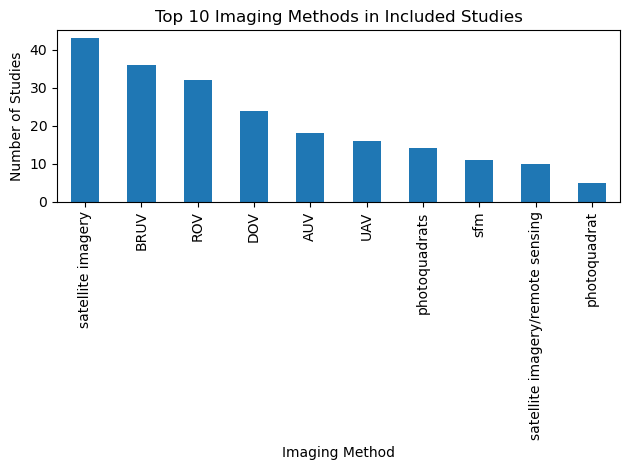

In [9]:
# Top 10 imaging methods
plt.figure()
method_counts.head(10).plot(kind="bar")
plt.xlabel("Imaging Method")
plt.ylabel("Number of Studies")
plt.title("Top 10 Imaging Methods in Included Studies")
plt.tight_layout()
plt.show()


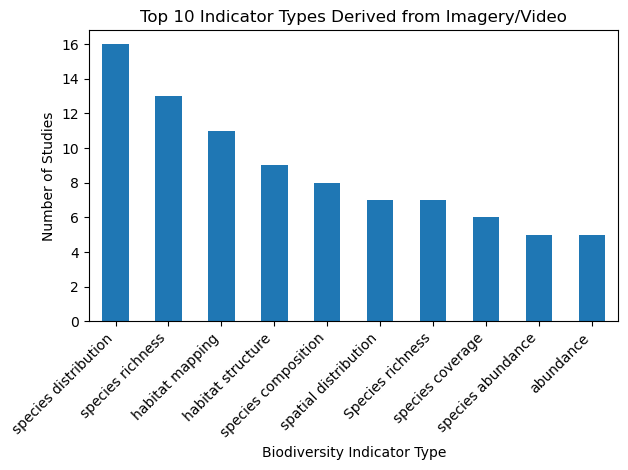

In [10]:
# Top 10 indicator types
plt.figure()
indicator_counts.head(10).plot(kind="bar")
plt.xlabel("Biodiversity Indicator Type")
plt.ylabel("Number of Studies")
plt.title("Top 10 Indicator Types Derived from Imagery/Video")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


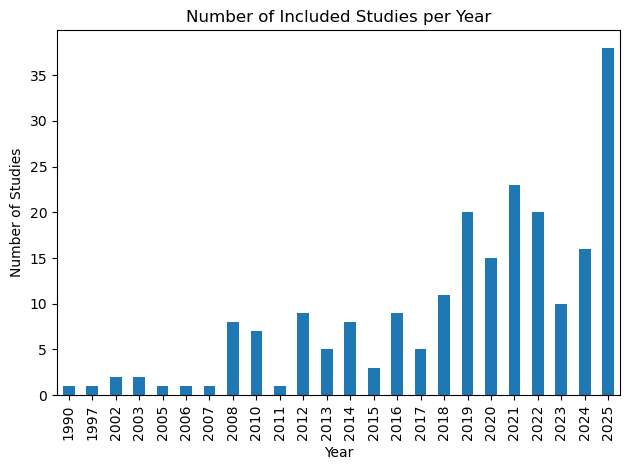

In [11]:

# Publications per year
plt.figure()
year_counts.plot(kind="bar")
plt.xlabel("Year")
plt.ylabel("Number of Studies")
plt.title("Number of Included Studies per Year")
plt.tight_layout()
plt.show()